# Cena Bitcoina

In [8]:
%matplotlib inline
import matplotlib
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

import numpy as np

### Naloži podatke

In [9]:
bitstamp_file = open("../data/price/bitstamp_bitcoin.txt")
coinmarketcap_file = open("../data/price/coinmarketcap_bitcoin.txt")

def parse_file(file):
    timestamps = []
    prices = []
    
    first_line = True
    for line in file:
        if (first_line):
            first_line = False
            continue
        
        line_split = line.split(";")
        
        date_string = line_split[0]
        time_string = line_split[1]
        price = float(line_split[2])
        
        timestamps.append((date_string, time_string))
        prices.append(price)
        
    return (timestamps, prices)

bitstamp_timestamps, bitstamp_prices = parse_file(bitstamp_file)
coinmarketcap_timestamps, coinmarketcap_prices = parse_file(coinmarketcap_file)

### Osnovna Statistika

In [13]:
# Povprečje
bitstamp_mean = np.mean(bitstamp_prices)
coinmarketcap_mean = np.mean(coinmarketcap_prices)

# Mediana
bitstamp_median = np.median(bitstamp_prices)
coinmarketcap_median = np.median(coinmarketcap_prices)

# Max, Min
bitstamp_max = np.max(bitstamp_prices)
bitstamp_min = np.min(bitstamp_prices)
coinmarketcap_max = np.max(coinmarketcap_prices)
coinmarketcap_min = np.min(coinmarketcap_prices)
print("Povprečna cena:")
print("* Bitstamp:", bitstamp_mean)
print("* CoinMarketCap:", coinmarketcap_mean)
print()
print("Najvišja/Najnižja cena:")
print("* Bitstamp najvišja:", bitstamp_max)
print("* Bitstamp najnižja:", bitstamp_min)
print("* CoinMarketCap najvišja:", coinmarketcap_max)
print("* CoinMarketCap najnižja:", coinmarketcap_min)

Povprečna cena:
* Bitstamp: 5615.642
* CoinMarketCap: 5636.264

Najvišja/Najnižja cena:
* Bitstamp najvišja: 6103.0
* Bitstamp najnižja: 5395.0
* CoinMarketCap najvišja: 6120.96
* CoinMarketCap najnižja: 5411.49


### Vizualizacija

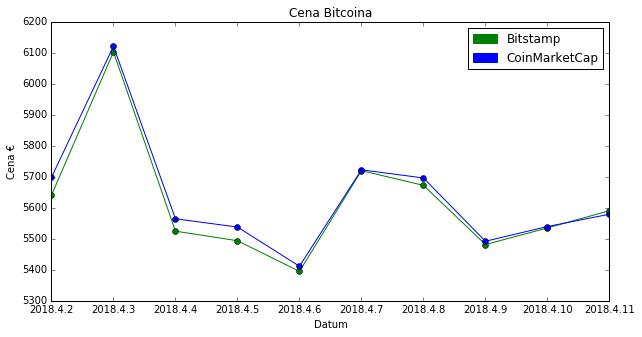

In [14]:
fig, ax = plt.subplots()

x_es = list(range(len(bitstamp_timestamps)))
x_ticks = [date_time[0] for date_time in bitstamp_timestamps]

fig.set_size_inches(10,5)

# bitstamp
bitstamp_color = "green"
plt.plot(x_es, bitstamp_prices,
         linestyle='-',marker="o",
         color=bitstamp_color)
bitstamp_patch = mpatches.Patch(color=bitstamp_color, label='Bitstamp')

# coinmarketcap
coinmarketcap_color = "blue"
plt.plot(x_es, coinmarketcap_prices,
         linestyle='-',marker="o",
        color=coinmarketcap_color)
coinmarketcap_patch = mpatches.Patch(color=coinmarketcap_color, label='CoinMarketCap')

plt.title("Cena Bitcoina")

plt.legend(handles=[bitstamp_patch, coinmarketcap_patch])

plt.ylabel("Cena €")
plt.xlabel("Datum")

plt.xticks(x_es, x_ticks)

plt.show()
plt.draw()

In [15]:
# Shrani
fig.savefig('../assets/cena_bitcoina.png')